# Mount Google Drive 
To YesWeGanData1 to access the required TfRecords through google drive

In [1]:
# Mount to YesWeGanData1@gmail.com
#password:Password: YiannisJake123 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# tf.__version__

#Function.py
To allow for easy to understand, easy to run notebooks, much of the code is hidden in multiple .py folders.

The strcuture of the networks, the paramaters for the optimisers and the path to the folder locations can all be found here.
The code below imports this code from the specified path

These Python files are backed up by my github account. See this link:
https://github.com/PMacBeets/YesWeGan_

In [2]:
# Access Python Modules In Google Drive

# 


import importlib.util
# I did this to download a module of python functions from a path on google collab
# I assume if you just change the path it should operate fine

# Files for reading in Data
spec = importlib.util.spec_from_file_location("ReadFiles","/content/gdrive/My Drive/PythonFiles_git/ReadFiles.py")
ReadFiles = importlib.util.module_from_spec(spec)
spec.loader.exec_module(ReadFiles)
print(ReadFiles.cube(2))
print(ReadFiles)
print(ReadFiles.FILEHASHKEY)


# Files for Generatring Network Models
spec = importlib.util.spec_from_file_location("NetworkModels","/content/gdrive/My Drive/PythonFiles_git/NetworkModels.py")
NetworkModels = importlib.util.module_from_spec(spec)
spec.loader.exec_module(NetworkModels)
print(NetworkModels.square(2))
print(NetworkModels)
print(NetworkModels.FILEHASHKEY)

# Files for Running Model
spec = importlib.util.spec_from_file_location("Training","/content/gdrive/My Drive/PythonFiles_git/Training.py")
Training = importlib.util.module_from_spec(spec)
spec.loader.exec_module(Training)
print(Training.print_hashkey())
print(Training)




8
<module 'ReadFiles' from '/content/gdrive/My Drive/PythonFiles_git/ReadFiles.py'>
123


Using TensorFlow backend.


4
<module 'NetworkModels' from '/content/gdrive/My Drive/PythonFiles_git/NetworkModels.py'>
8
4
None
<module 'Training' from '/content/gdrive/My Drive/PythonFiles_git/Training.py'>


In [3]:
cd /content

/content


# Load Pre-trained Models

In [4]:
# Load Models
import tensorflow as tf
model_folder = '/content/drive/My Drive/Colab_Notebooks/FashionAssignment/saved_model/ResNet/adam_constant_dropout_50/checkpoint'
Generator = tf.keras.models.load_model("/content/gdrive/My Drive/Gen Models/Gen_ModelA")
Discriminator = tf.keras.models.load_model("/content/gdrive/My Drive/Disc Models/Disc_ModelA")


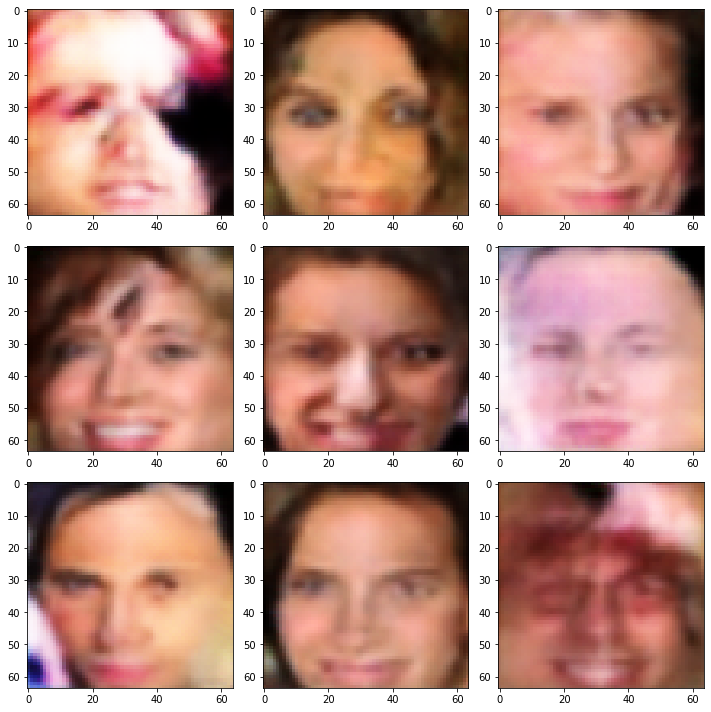

In [6]:
# Test Generator
import matplotlib.pyplot as plt
Num = 10
num_latent = 128
test_seed = tf.random.normal([Num, num_latent])
gen_image = Generator(test_seed , training=False)

plt.figure(figsize=(10, 10))

for ind, im in enumerate(gen_image[:9]):
    im = tf.keras.preprocessing.image.array_to_img(im)
    plt.subplot(3, 3, ind+1)
    plt.imshow(im)
plt.tight_layout()
plt.show()

# Read Tf Records
 - flag = "MNIST" to download MNIST numbers
 - flag = "CelebA" to download celebA data
    - Different folder corresponds to different dataset
    - Each unique folder must automatically have aunique number of files that need to be read...ect
    - Could use the size and channel info to automatically assign generators later

<ShuffleDataset shapes: ((None, None, None), ()), types: (tf.float32, tf.string)>


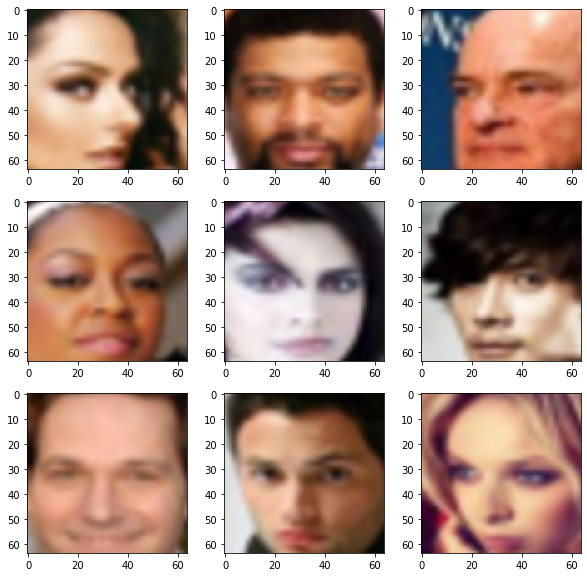

-0.8813726 0.96911764
<BatchDataset shapes: ((None, None, None, None), (None,)), types: (tf.float32, tf.string)>


In [0]:
import matplotlib.pyplot as plt
from keras import backend
from math import gcd
import tensorflow as tf

batch_size = 64
num_instance = 0

data_flag = "CelebA"         # "CelebA" or "MNIST"

# Our analysis focused in zoomed in images of 64x64x3 and 28x28x1

#below paramters only relevant if data_flag="CelebA"
zoom = True     # True or False
size = 64      #64 or 28
channels = 3    #3 or 1

dataset = ReadFiles.ReadData(flag=data_flag,zoom=zoom,size=size,channels=channels,plotdata=True,batch_size=batch_size )

print(dataset)

# Generator

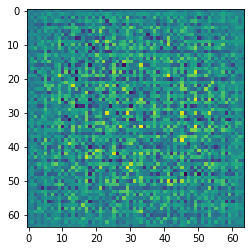

In [0]:
num_latent = 128 # Noise Vector Length Variable


generator = NetworkModels.make_generator_model_DCGAN_Final()

noise = tf.random.normal([1, num_latent])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])


In [0]:
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             2113536   
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1024)        0         
_________________________________________________________________
up1 (Conv2DTranspose)        (None, 8, 8, 512)         8388608   
_________________________________________________________________
bn1 (BatchNormalization)     (None, 8, 8, 512)         2048      
_________________________________________________________________
relu1 (ReLU)                 (None, 8, 8, 512)         0         
_________________________________________________________________
up2 (Conv2DTranspose)        (None, 16, 16, 256)       2097152   
_________________________________________________________________
bn2 (BatchNormalization)     (None, 16, 16, 256)       10

# Discriminator

In [0]:
Batch_Norm=True
discriminator = NetworkModels.make_discriminator_model_DCGAN_Final(Batch_Norm)#NetworkModels.make_discriminator_model_MNIST()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-2.5301844e-05]], shape=(1, 1), dtype=float32)


In [0]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
from_im (Conv2D)             (None, 64, 64, 64)        1792      
_________________________________________________________________
lrelu0 (LeakyReLU)           (None, 64, 64, 64)        0         
_________________________________________________________________
down1 (Conv2D)               (None, 32, 32, 128)       131072    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 32, 32, 128)       512       
_________________________________________________________________
lrelu1 (LeakyReLU)           (None, 32, 32, 128)       0         
_________________________________________________________________
trans1 (Conv2D)              (None, 32, 32, 128)       147456    
_________________________________________________________________
bn2 (BatchNormalization)     (None, 32, 32, 128)     

In [0]:
import time
from IPython import display

num_epoch = 1
num_ex_FID = batch_size  #num_examples_to_generate_FID

generator_optimizer = tf.keras.optimizers.Adam(5e-4, beta_1=0.5)
discriminator_optimizer  = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

FID_bool = True
FID_batch_interval= 100
label_smoothing = 0.1

loss_func_key = "non_sat" #"binarycrossentropy" ""wasserstein""

# one seed for to create the GIF, another seed to generate more images fir FID evaluation
num_ex_GIF = 16    # num_examples_to_generate_GIF

# We will reuse this seed overtime to visualize progress in animated GIF
seed_GIF = tf.random.normal([num_ex_GIF, num_latent])
seed_FID = tf.random.normal([num_ex_FID, num_latent])


In [0]:
# Paramters to be passed into the train function

var = {
    "epochs":num_epoch,
    "num_latent":num_latent,
    "batch_size":batch_size, 
    "label_smoothing":label_smoothing,  
}

instr ={
    "FID":FID_bool,
    "dataflag": data_flag,
    'FID_batch_interval':FID_batch_interval,
}

seeds = {
    "seed_GIF":seed_GIF,
    "seed_FID": seed_FID,
    "num_ex_GIF":num_ex_GIF,    #numer of samples for the GIF
    "num_ex_FID":num_ex_FID     #number of samples to calculate the FID
}

model = {
    "generator":generator,
    "discriminator":discriminator,
    "loss_func":loss_func_key,
    "generator_optimizer": generator_optimizer,
    "discriminator_optimizer": discriminator_optimizer  
}


In [0]:
#train(training_data.dataset, num_epoch,seed)
# imbed ns into generic method
OUT = Training.train2(dataset,var=var,instr=instr,seeds=seeds,model=model)


Epoch:0  Number of images processed: 124160
1941/3165 [=================>............]

In [0]:


# generator.save("/content/gdrive/My Drive/Gen_ModelA")
# discriminator.save("/content/gdrive/My Drive/Disc_ModelA")
# Rename them manually

In [0]:
print(len(loss_history["G"]))
print(loss_history["G"][0].shape)
print(len(loss_history["ave_real"]))
print(loss_history["ave_real"][0].shape)

In [0]:
test_seed = tf.random.normal([num_ex_GIF, num_latent])
gen_image = generator(test_seed , training=False)

plt.figure(figsize=(10, 10))

for ind, im in enumerate(gen_image[:9]):
    im = tf.keras.preprocessing.image.array_to_img(im)
    plt.subplot(3, 3, ind+1)
    plt.imshow(im)
plt.tight_layout()
plt.show()

In [0]:
import numpy as np

FID = OUT[0]

if data_flag == "CelebA":
  num_instance = 202599
elif data_flag == "MNIST":
  num_instance = 60000

if instr['FID_batch_interval']!=0:
  num_steps_per_epoch = num_instance // batch_size
  length = num_steps_per_epoch*num_epoch/instr['FID_batch_interval']
else:
  length = num_epoch

epoch_by_batch = np.linspace(0,1,round(length))
plt.plot(epoch_by_batch,FID, label='FID Distance')


In [0]:
import numpy as np

FID_MC = OUT[2]
plt.plot(epoch_by_batch,FID_MC, label='FID Distance')

In [0]:
loss_history = OUT[1]

import numpy as np


# where does 3166 come from???
#epoch_by_batch = np.arange(0,num_epoch+1,10/(len(loss_history["G"])*num_epoch))
epoch_by_batch = np.linspace(0, num_epoch, num=(len(loss_history["G"])))

#epoch_by_batch = epoch_by_batch[0:-1]
plt.plot(epoch_by_batch,loss_history["G"], label='Generator Loss')
plt.plot(epoch_by_batch,loss_history["D"], label='Discriminator Loss')
plt.legend()

In [0]:
#epoch_by_batch = epoch_by_batch[0:-1]
plt.plot(epoch_by_batch,loss_history["ave_real"], label='Average Output for Real Inputs')
plt.plot(epoch_by_batch,loss_history["ave_fake"], label='Average Output for Fake Inputs')
plt.legend()

In [0]:
#epoch_by_batch = epoch_by_batch[0:-1]
plt.plot(epoch_by_batch,loss_history["mse_real"], label='MSE for Real Inputs')
plt.plot(epoch_by_batch,loss_history["mse_fake"], label='MSE for Fake Inputs')
plt.legend()

In [0]:
num_FID_MC = 64
from keras.applications.inception_v3 import InceptionV3
V3input_shape =(75, 75, 3)
modelv3 = InceptionV3(include_top=False, pooling='avg', input_shape=V3input_shape)
fid = Training.calc_FID_MC(generator,num_FID_MC,num_latent,modelv3)
print(fid)